# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
!pip install kmodes
!pip install gower
!pip install scikit-learn-extra
from gower import gower_matrix
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.stats import skew, kurtosis
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial.distance import cdist
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ragahammam/machine_learning_projects/refs/heads/main/datasets/smokers_health_data/smoking_health_data_final.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()
#missing values check
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


,0
cigs_per_day,14
chol,7


*Missing values* terlihat pada kolom cigs_per_day dengan nilai 14 dan pada kolom chol dengan nilai 7 dan untuk penanganannya akan dilakukan pengisian.

Berikut analisis distribusi variabel numerik dan visualisasi dengan histogram.

               age   heart_rate  cigs_per_day         chol
count  3900.000000  3900.000000   3886.000000  3893.000000
mean     49.537949    75.688974      9.168554   236.595941
std       8.559275    12.015376     12.037999    44.375365
min      32.000000    44.000000      0.000000   113.000000
25%      42.000000    68.000000      0.000000   206.000000
50%      49.000000    75.000000      0.000000   234.000000
75%      56.000000    82.000000     20.000000   263.000000
max      70.000000   143.000000     70.000000   696.000000


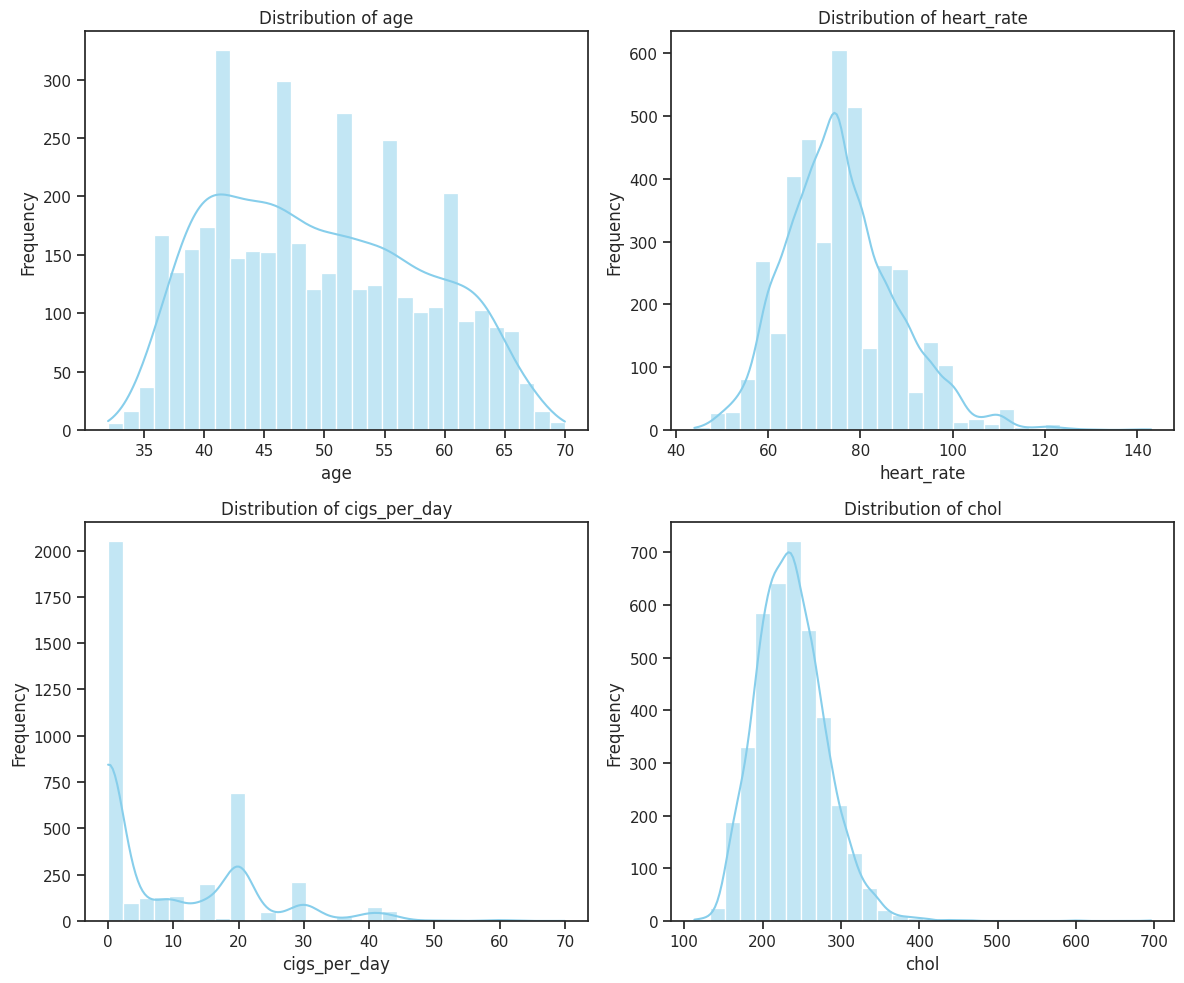

In [ ]:
df_descriptive = df.describe()
print(df_descriptive)

numerical = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical, 1):
    plt.subplot((len(numerical) + 1) // 2, 2, i)
    sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berikut pemeriksaan hubungan antara variabel menggunakan matriks korelasi.

Correlation Matrix:
                   age  heart_rate  cigs_per_day      chol
age           1.000000   -0.012702     -0.192625  0.255480
heart_rate   -0.012702    1.000000      0.072296  0.093696
cigs_per_day -0.192625    0.072296      1.000000 -0.027454
chol          0.255480    0.093696     -0.027454  1.000000


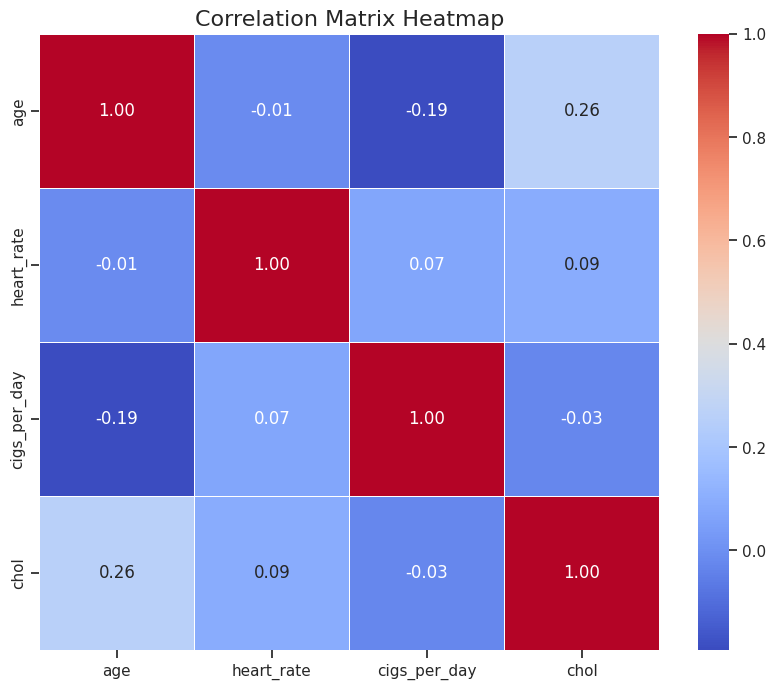

In [ ]:
# Correlation matrix
correlation_matrix = df[numerical].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

Berikut visualisasi untuk variabel kategorikal.

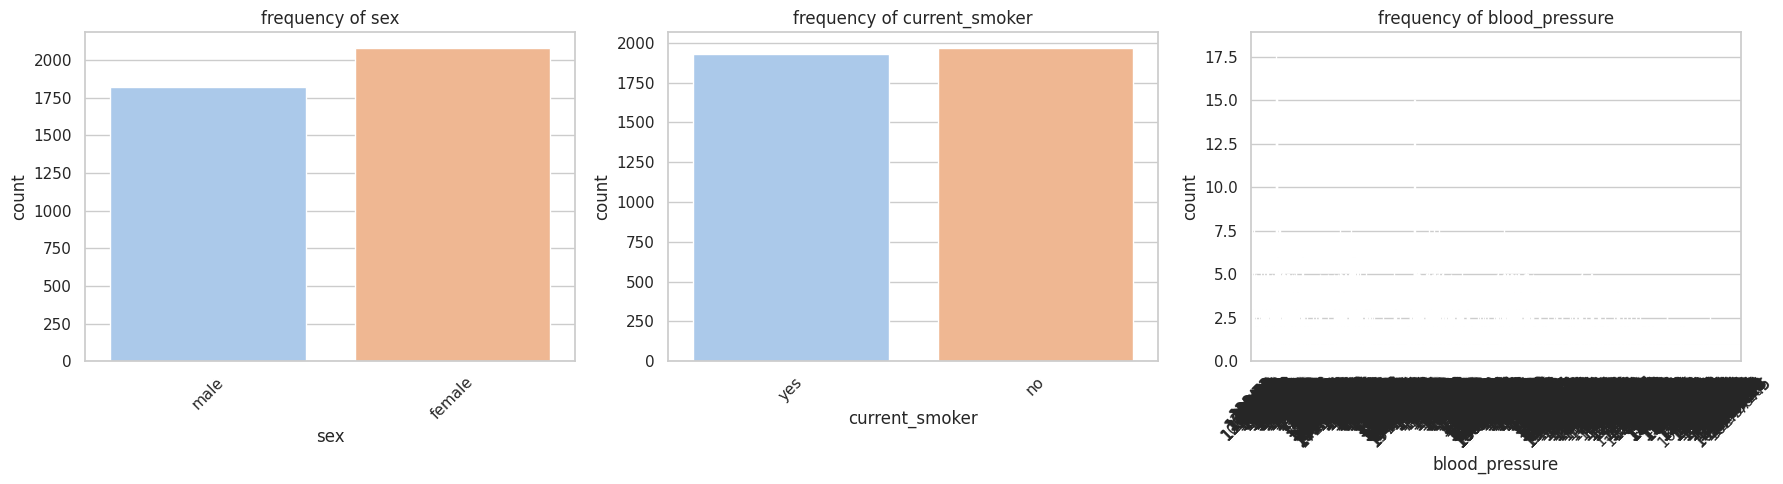

In [ ]:
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
sns.set(style="whitegrid")

plt.figure(figsize=(18, 5))

for i, col in enumerate(categorical, 1):
    plt.subplot(1, len(categorical), i)
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'frequency of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Perlu dilakukan *encoding* yang akan dilakukan pada bagian *data preprocessing*

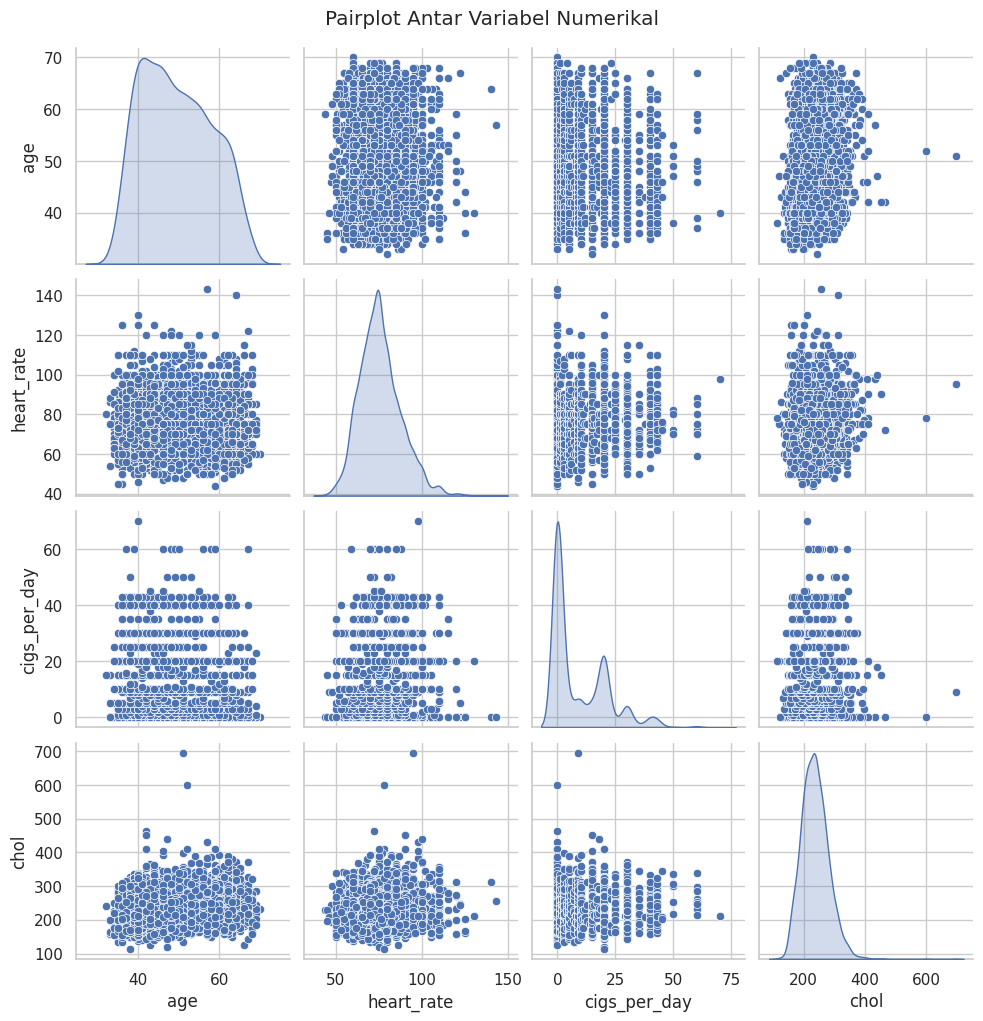

In [ ]:
sns.pairplot(df[numerical], diag_kind='kde')
plt.suptitle("Pairplot Antar Variabel Numerikal", y=1.02)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Missing values handling
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

numeric_features = df[less].select_dtypes(include=['number']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# Identify duplicates
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [age, sex, current_smoker, heart_rate, blood_pressure, cigs_per_day, chol]
Index: []


In [ ]:
# Feature Extraction
df.info()
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3900 non-null   float64
 6   chol            3900 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Convert categorical columns to strings
categorical_cols = ['sex', 'current_smoker', 'blood_pressure']
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply PCA to selected numeric columns
pca_columns = ['age', 'heart_rate', 'chol']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[pca_columns])
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=df.index)

# Create new DataFrame by replacing original PCA columns with components
df_pca = df.drop(columns=pca_columns).join(pca_df)

# Compute Gower distance matrix
gower_dist_matrix = gower_matrix(df_pca)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

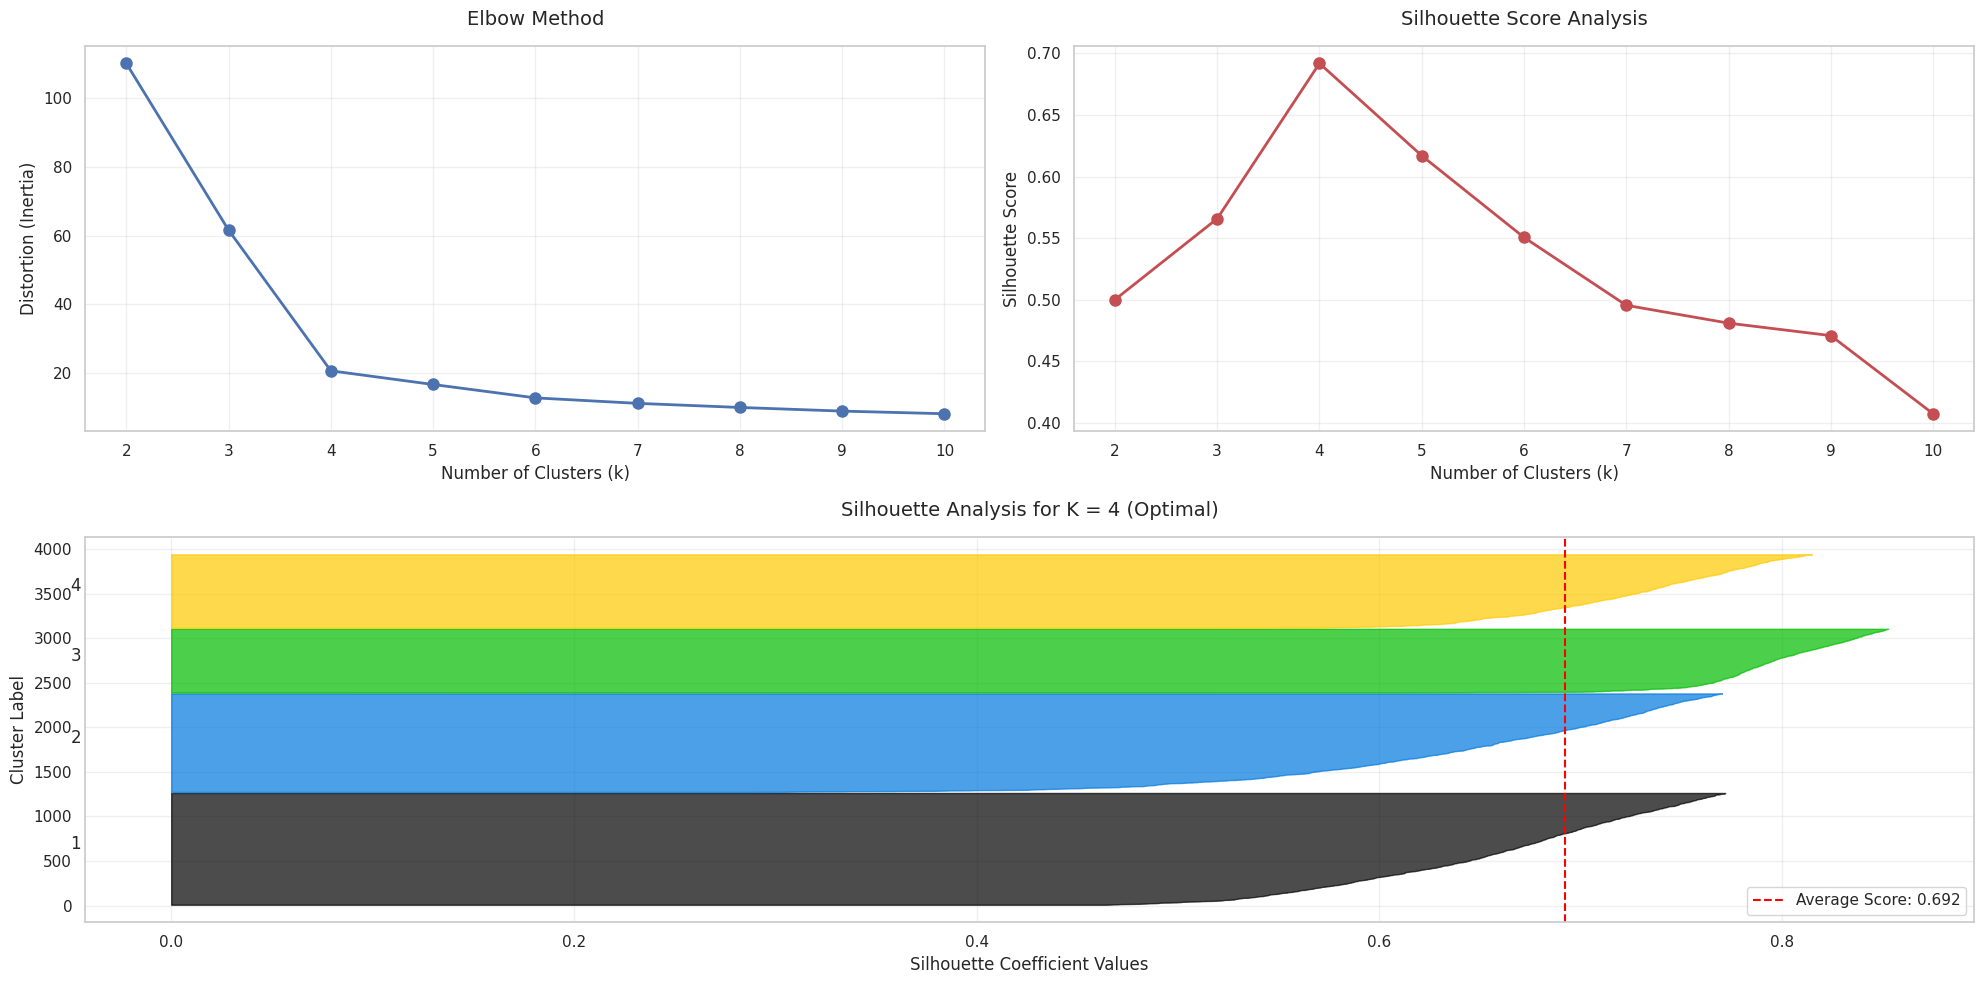


Clustering Analysis Results:
Optimal number of clusters (k): 4
Best silhouette score: 0.692
Average silhouette width: 0.692

Cluster Sizes:
Cluster 1: 1254 samples
Cluster 2: 1106 samples
Cluster 3: 715 samples
Cluster 4: 825 samples


In [ ]:
# Evaluate with 'blood_pressure'
def evaluate_clustering(distance_matrix, max_clusters=10, random_state=42):
    # Convert to 2D coordinates using MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state)
    coords = mds.fit_transform(distance_matrix)

    distortions = []
    silhouette_scores = []
    K = range(2, max_clusters + 1)
    labels_list = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(coords)

        distortions.append(kmeans.inertia_)
        sil_score = silhouette_score(coords, cluster_labels)
        silhouette_scores.append(sil_score)
        labels_list.append(cluster_labels)

    # Find optimal k
    optimal_k = np.argmax(silhouette_scores) + 2
    best_labels = labels_list[optimal_k - 2]
    best_labels = best_labels + 1

    try:
        sns.set_style("whitegrid")
    except:
        plt.style.use('default')

    # Create visualization
    fig = plt.figure(figsize=(20, 10))

    # 1. Elbow and Silhouette Overview
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))

    # Elbow plot
    ax1.plot(K, distortions, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax1.set_ylabel('Distortion (Inertia)', fontsize=12)
    ax1.set_title('Elbow Method', fontsize=14, pad=15)
    ax1.grid(True, alpha=0.3)

    # Silhouette score plot
    ax2.plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax2.set_ylabel('Silhouette Score', fontsize=12)
    ax2.set_title('Silhouette Score Analysis', fontsize=14, pad=15)
    ax2.grid(True, alpha=0.3)

    # 2. Silhouette Analysis for optimal k
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(coords, best_labels)

    y_lower = 10
    for i in range(1, optimal_k + 1):  # Start from 1 instead of 0
        ith_cluster_silhouette_values = sample_silhouette_values[best_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i - 1) / optimal_k)
        ax3.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax3.set_xlabel('Silhouette Coefficient Values', fontsize=12)
    ax3.set_ylabel('Cluster Label', fontsize=12)
    avg_score = np.mean(sample_silhouette_values)
    ax3.axvline(x=avg_score, color="red", linestyle="--",
                label=f'Average Score: {avg_score:.3f}')
    ax3.set_title(f'Silhouette Analysis for K = {optimal_k} (Optimal)',
                  fontsize=14, pad=15)
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.tight_layout()
    plt.show()

    print("\nClustering Analysis Results:")
    print(f"Optimal number of clusters (k): {optimal_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")
    print(f"Average silhouette width: {avg_score:.3f}")

    # Calculate cluster sizes
    unique, counts = np.unique(best_labels, return_counts=True)
    print("\nCluster Sizes:")
    for cluster, size in zip(unique, counts):
        print(f"Cluster {cluster}: {size} samples")

    return distortions, silhouette_scores, optimal_k, coords, best_labels

distortions, silhouette_scores, optimal_k, coords, best_labels = evaluate_clustering(gower_dist_matrix)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

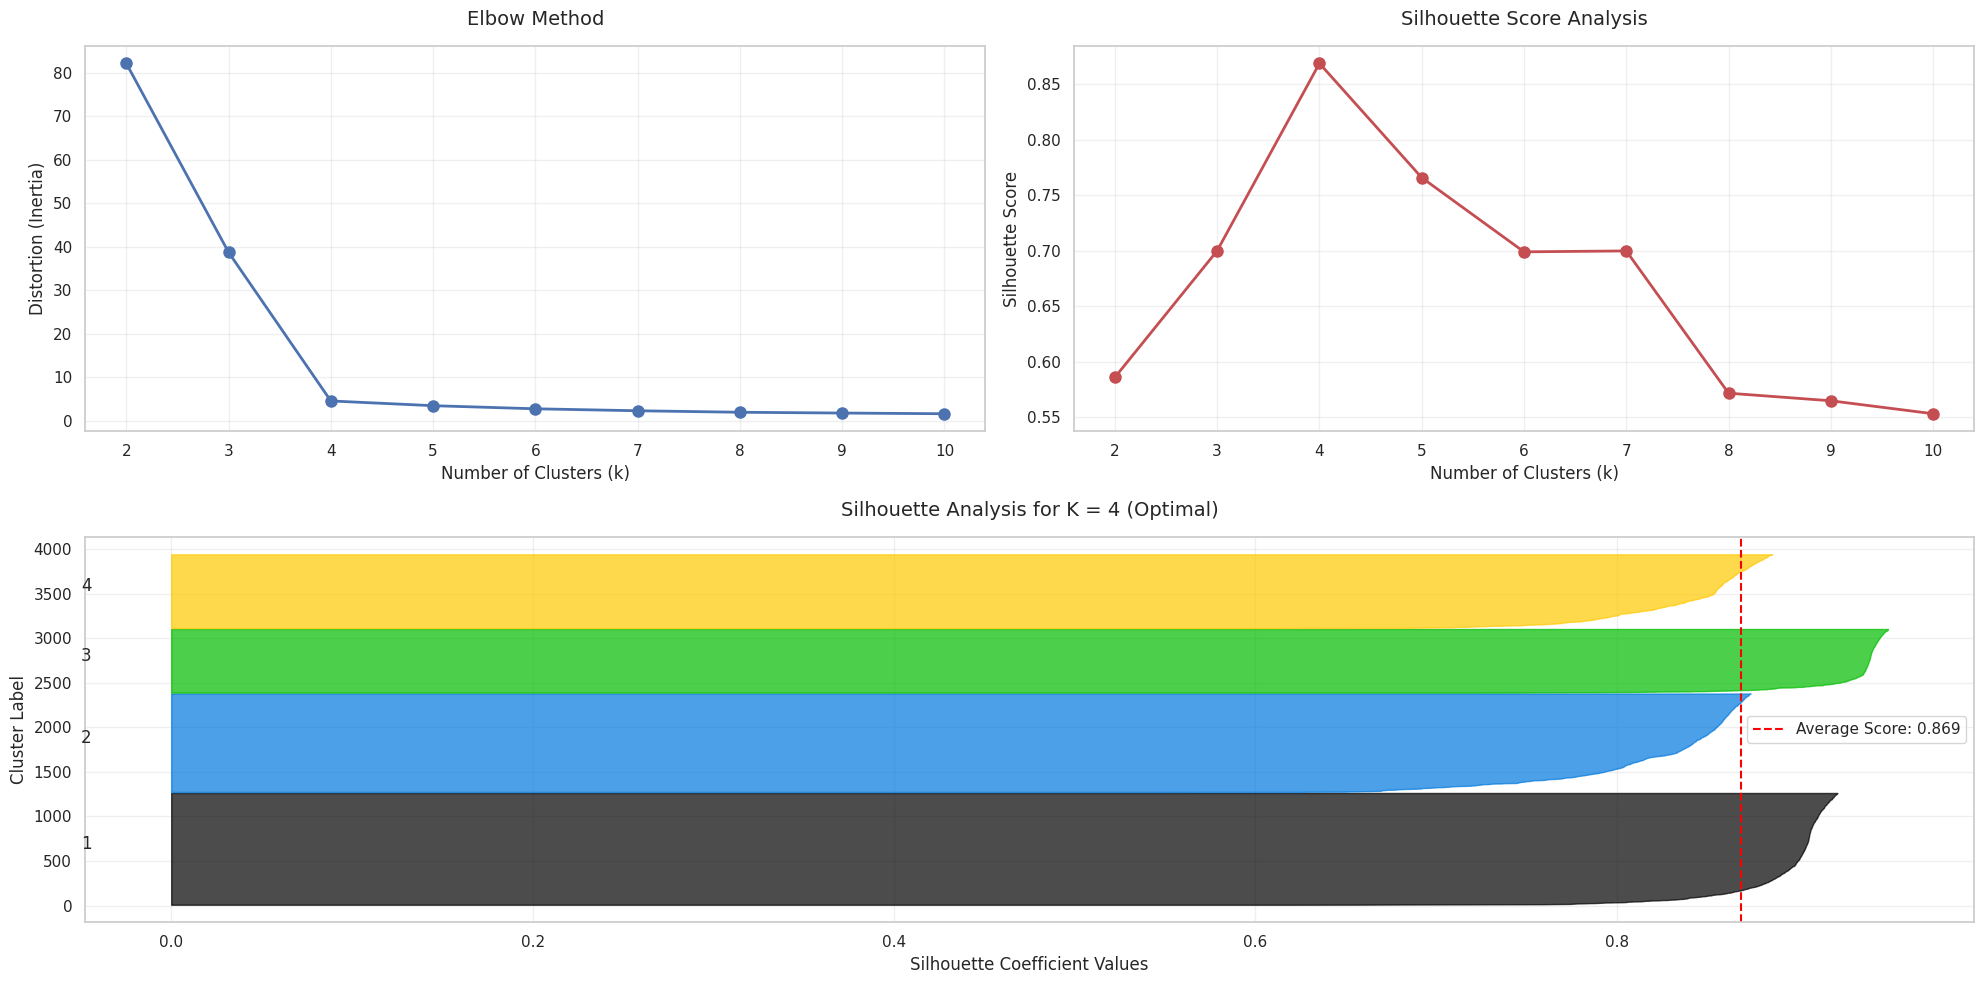


Clustering Analysis Results:
Optimal number of clusters (k): 4
Best silhouette score: 0.869
Average silhouette width: 0.869

Cluster Sizes:
Cluster 1: 1254 samples
Cluster 2: 1105 samples
Cluster 3: 714 samples
Cluster 4: 827 samples


In [ ]:
# Drop the 'blood_pressure' column
df = df.drop(columns=['blood_pressure'])

# Convert categorical columns to strings
categorical_cols = ['sex', 'current_smoker']
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply PCA to selected numeric columns
pca_columns = ['age', 'heart_rate', 'chol', 'systolic', 'diastolic']
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[pca_columns])
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=df.index)

# Create new DataFrame by replacing original PCA columns with components
df_pca = df.drop(columns=pca_columns).join(pca_df)

# Compute Gower distance matrix
gower_dist_matrix = gower_matrix(df_pca)

# Evaluate dropped 'blood_pressure'
def evaluate_clustering(distance_matrix, max_clusters=10, random_state=42):
    # Convert to 2D coordinates using MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=random_state)
    coords = mds.fit_transform(distance_matrix)

    distortions = []
    silhouette_scores = []
    K = range(2, max_clusters + 1)
    labels_list = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(coords)

        distortions.append(kmeans.inertia_)
        sil_score = silhouette_score(coords, cluster_labels)
        silhouette_scores.append(sil_score)
        labels_list.append(cluster_labels)

    # Find optimal k
    optimal_k = np.argmax(silhouette_scores) + 2
    best_labels = labels_list[optimal_k - 2]
    best_labels = best_labels + 1

    try:
        sns.set_style("whitegrid")
    except:
        plt.style.use('default')

    # Create visualization
    fig = plt.figure(figsize=(20, 10))

    # 1. Elbow and Silhouette Overview
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))

    # Elbow plot
    ax1.plot(K, distortions, 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax1.set_ylabel('Distortion (Inertia)', fontsize=12)
    ax1.set_title('Elbow Method', fontsize=14, pad=15)
    ax1.grid(True, alpha=0.3)

    # Silhouette score plot
    ax2.plot(K, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax2.set_ylabel('Silhouette Score', fontsize=12)
    ax2.set_title('Silhouette Score Analysis', fontsize=14, pad=15)
    ax2.grid(True, alpha=0.3)

    # 2. Silhouette Analysis for optimal k
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(coords, best_labels)

    y_lower = 10
    for i in range(1, optimal_k + 1):
        ith_cluster_silhouette_values = sample_silhouette_values[best_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i - 1) / optimal_k)
        ax3.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers
        ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax3.set_xlabel('Silhouette Coefficient Values', fontsize=12)
    ax3.set_ylabel('Cluster Label', fontsize=12)
    avg_score = np.mean(sample_silhouette_values)
    ax3.axvline(x=avg_score, color="red", linestyle="--",
                label=f'Average Score: {avg_score:.3f}')
    ax3.set_title(f'Silhouette Analysis for K = {optimal_k} (Optimal)',
                  fontsize=14, pad=15)
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    plt.tight_layout()
    plt.show()

    print("\nClustering Analysis Results:")
    print(f"Optimal number of clusters (k): {optimal_k}")
    print(f"Best silhouette score: {max(silhouette_scores):.3f}")
    print(f"Average silhouette width: {avg_score:.3f}")

    # Calculate cluster sizes
    unique, counts = np.unique(best_labels, return_counts=True)
    print("\nCluster Sizes:")
    for cluster, size in zip(unique, counts):
        print(f"Cluster {cluster}: {size} samples")

    return distortions, silhouette_scores, optimal_k, coords, best_labels

distortions, silhouette_scores, optimal_k, coords, best_labels = evaluate_clustering(gower_dist_matrix)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

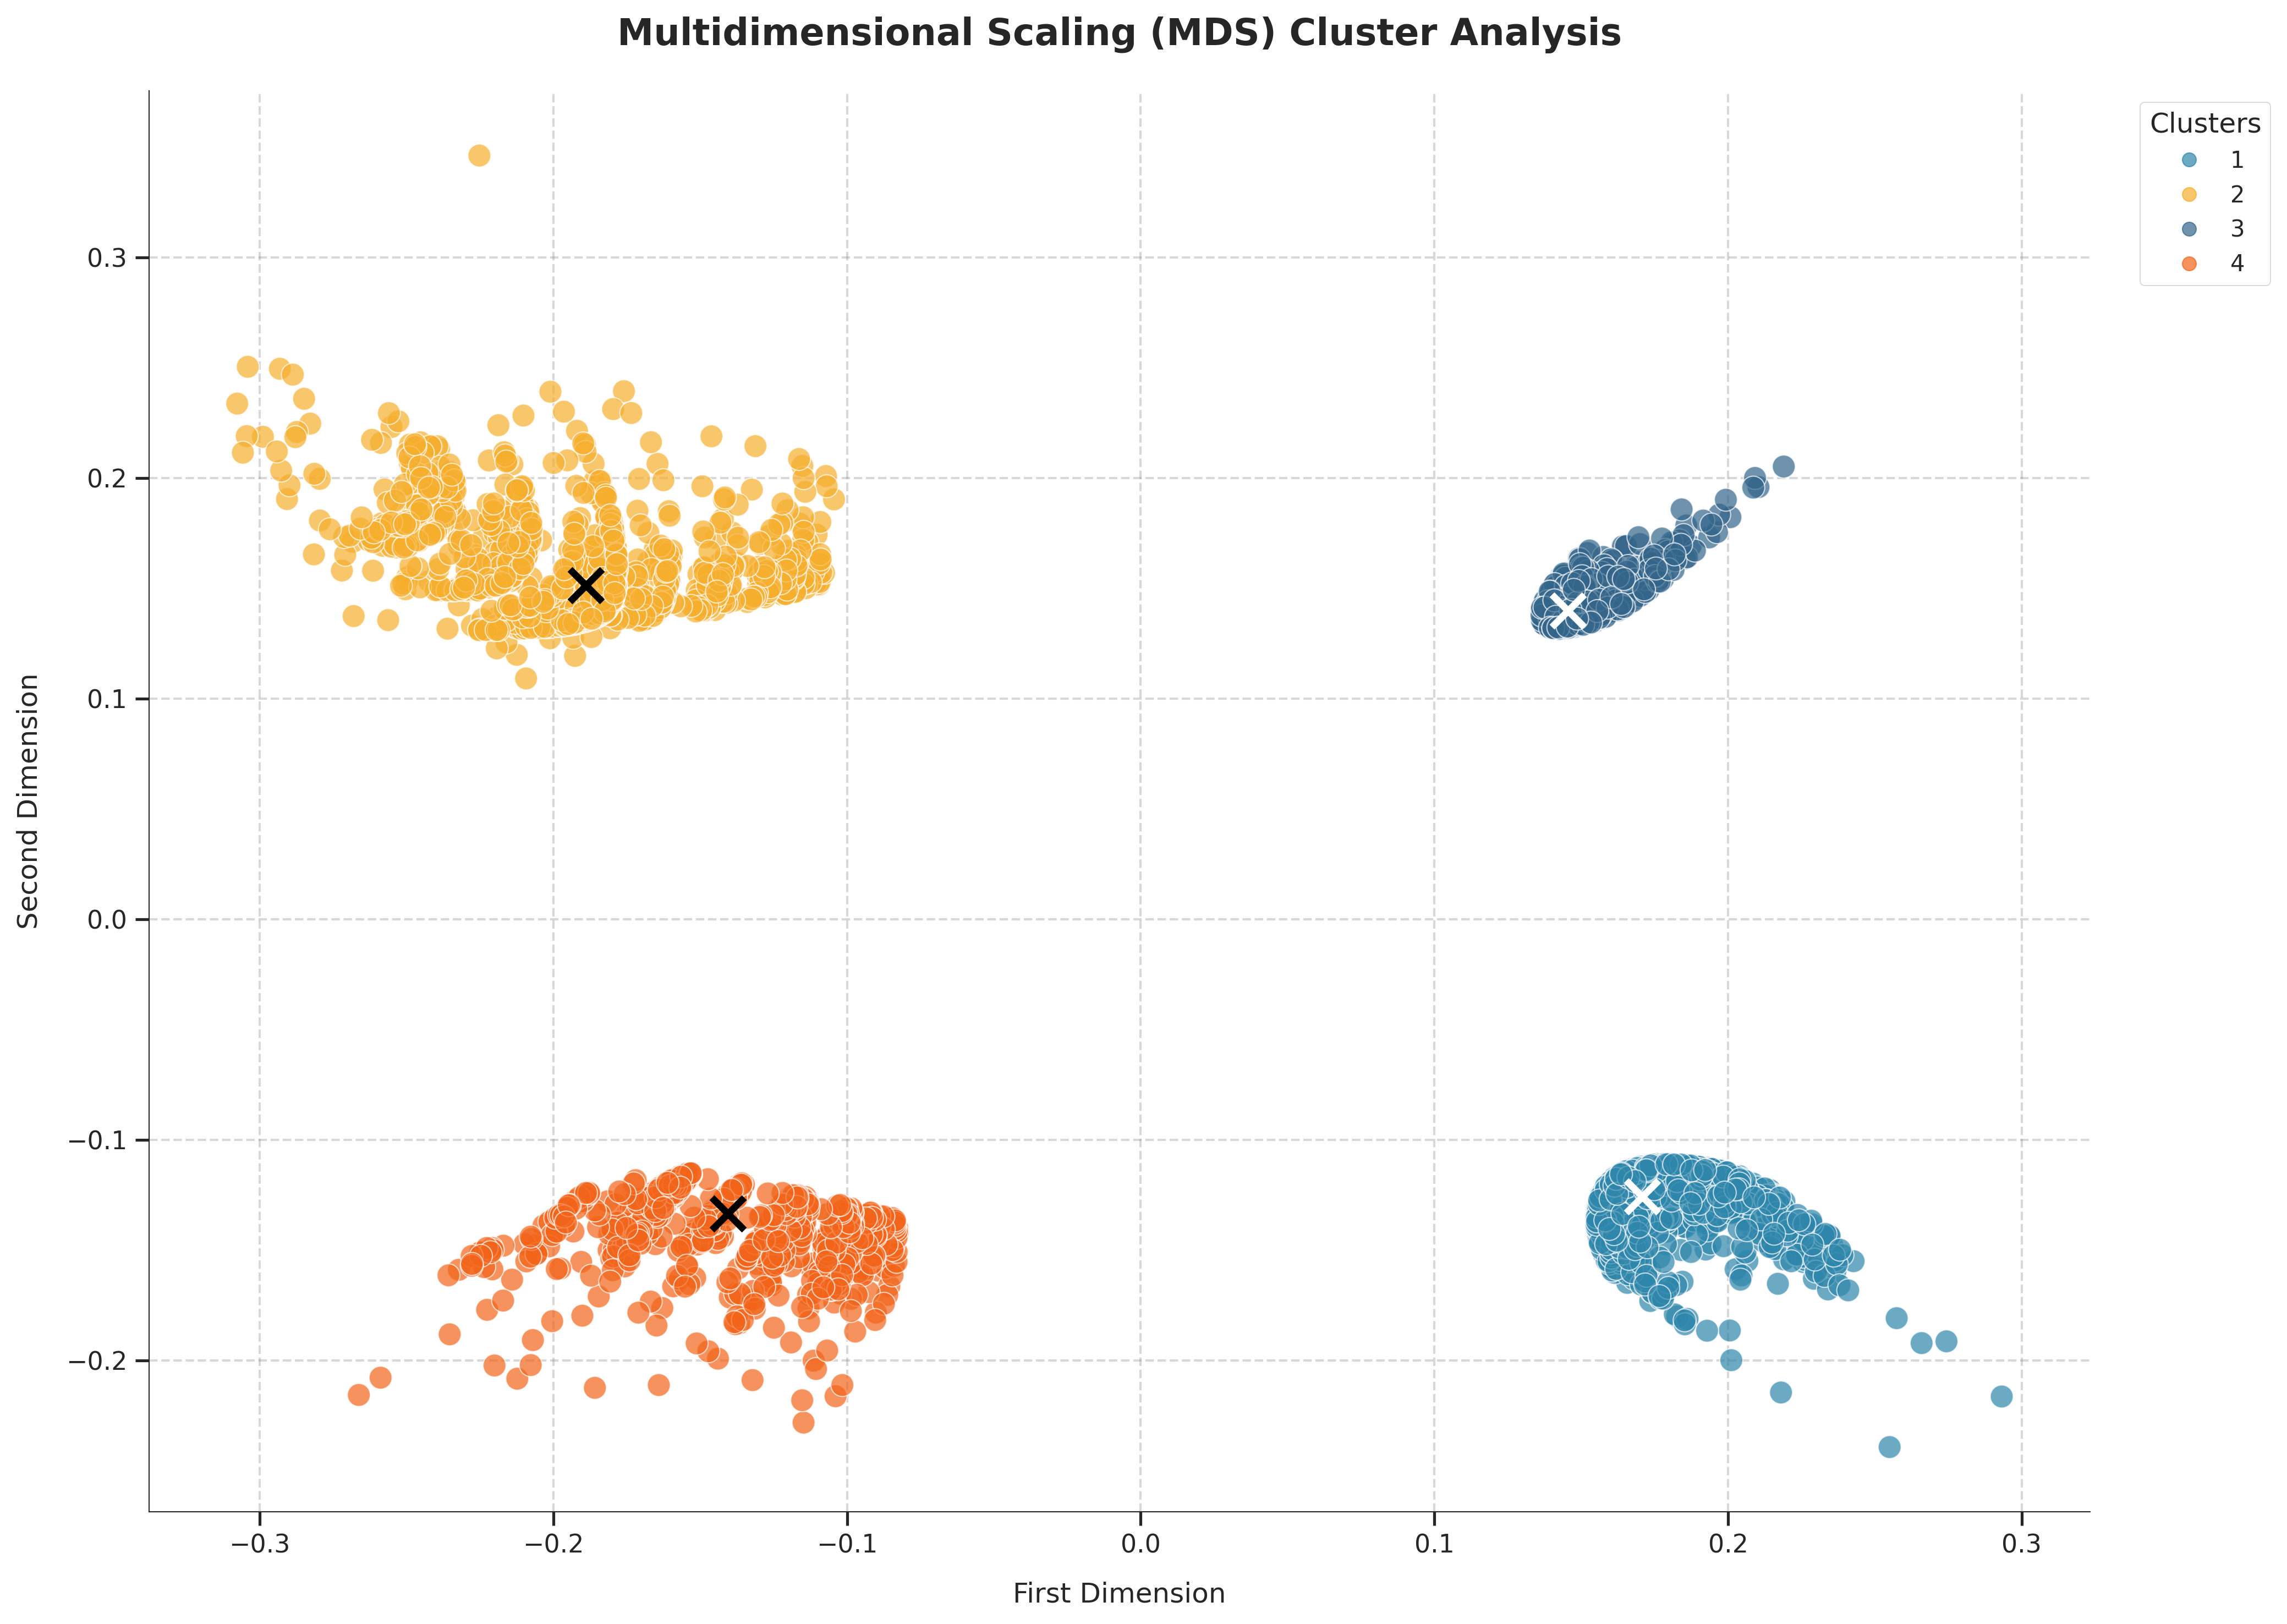

In [ ]:
plt.style.use('default')
sns.set_theme(style='ticks')

# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(gower_dist_matrix)

# Create a DataFrame with MDS coordinates
mds_df = pd.DataFrame(mds_coords, columns=['MDS1', 'MDS2'], index=df.index)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(mds_coords)

# Function to find medoids
def find_medoids(coords, labels):
    medoids = []
    for i in range(len(np.unique(labels))):
        cluster_points = coords[labels == i]
        distances = cdist(cluster_points, cluster_points)
        medoid_idx = np.argmin(np.sum(distances, axis=1))
        medoids.append(cluster_points[medoid_idx])
    return np.array(medoids)

# Calculate medoids
medoids = find_medoids(mds_coords, df['Cluster'])

# Create figure and axis with a larger figure size and higher DPI
fig, ax = plt.subplots(figsize=(14, 10), dpi=300, facecolor='white')

# Define color palette
colors = ['#2E86AB', '#F6AE2D', '#33658A', '#F26419']

# Create scatter plot
scatter = ax.scatter(mds_df['MDS1'],
                    mds_df['MDS2'],
                    c=df['Cluster'],
                    cmap=LinearSegmentedColormap.from_list('custom', colors),
                    s=100,
                    alpha=0.7,
                    edgecolor='white',
                    linewidth=0.5)

# Add medoids with 'X' markers
for i, medoid in enumerate(medoids):
    # Define contrasting colors for medoid markers
    medoid_colors = ['#FFFFFF', '#000000', '#FFFFFF', '#000000']  # Alternating black and white
    ax.scatter(medoid[0], medoid[1],
              marker='x',
              s=200,
              c=medoid_colors[i],
              linewidth=3,
              label=f'Medoid {i+1}')

# Grid
ax.grid(True, linestyle='--', alpha=0.3, color='gray')
ax.set_facecolor('white')

# Set labels and title
plt.title('Multidimensional Scaling (MDS) Cluster Analysis',
          pad=20,
          fontsize=16,
          fontweight='bold')

plt.xlabel('First Dimension',
          fontsize=12,
          fontweight='medium',
          labelpad=10)

plt.ylabel('Second Dimension',
          fontsize=12,
          fontweight='medium',
          labelpad=10)

# Create legend
legend_elements = scatter.legend_elements()[0]
legend_labels = [f'{i+1}' for i in range(4)]

# Customize legend
legend = ax.legend(handles=legend_elements,
                  labels=legend_labels,
                  title='Clusters',
                  title_fontsize=12,
                  fontsize=10,
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left')

# Add a thin border around legend
legend.get_frame().set_edgecolor('lightgray')
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_facecolor('white')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust remaining spines
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
print(df.describe())

# Numerical Variables Analysis
print("Numerical Variables Analysis")

numerical_cols = ['age', 'heart_rate', 'cigs_per_day', 'chol', 'systolic', 'diastolic']
num_summary = pd.DataFrame({
    'Min': [df[col].min() for col in numerical_cols],
    'Max': [df[col].max() for col in numerical_cols],
    'Mean': [df[col].mean() for col in numerical_cols],
    'Median': [df[col].median() for col in numerical_cols],
    'Std Dev': [df[col].std() for col in numerical_cols],
    'Q1 (25%)': [df[col].quantile(0.25) for col in numerical_cols],
    'Q3 (75%)': [df[col].quantile(0.75) for col in numerical_cols],
    'IQR': [df[col].quantile(0.75) - df[col].quantile(0.25) for col in numerical_cols],
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurt() for col in numerical_cols]
}, index=numerical_cols)

# Round values
num_summary = num_summary.round(2)
print(num_summary)

# Categorical Variables Analysis
print("\n")
print("Categorical Variables Analysis")

categorical_cols = ['sex', 'current_smoker']

for col in categorical_cols:
    value_counts = df[col].value_counts()
    mode_value = df[col].mode()[0]
    percentage = (value_counts / len(df)) * 100

    print(f"\n{col}")
    cat_data = pd.DataFrame({
        'Value': value_counts.index,
        'Count': value_counts.values,
        'Percentage (%)': percentage.values.round(2)
    })
    print(cat_data)

# Cluster Analysis
print("\n")
print("Cluster Analysis")

cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_percentage = (cluster_counts / len(df) * 100).round(2)
cluster_data = pd.DataFrame({
    'Count': cluster_counts.values,
    'Percentage (%)': cluster_percentage.values
}, index=[f"Cluster {i+1}" for i in cluster_counts.index])
print(cluster_data)

# Numerical Variables by Cluster
print("\n")
print("Numerical Variables by Cluster")

for col in numerical_cols:
    print(f"\n{col}")
    cluster_stats = df.groupby('Cluster')[col].agg(['min', 'max', 'mean', 'median', 'std']).round(2)
    cluster_stats.index = [f"Cluster {i+1}" for i in cluster_stats.index]
    print(cluster_stats)

# Categorical Variables
print("\n")
print("Categorical Variables by Clusters")

for cat_col in categorical_cols:
    print(f"\n{cat_col}")

    # Cross-tabulation
    cross_tab = pd.crosstab(df['Cluster'], df[cat_col])
    cross_tab_pct = pd.crosstab(df['Cluster'], df[cat_col], normalize='index') * 100

    # Combine counts and percentages
    result = pd.DataFrame()
    for col in cross_tab.columns:
        result[f"{col} (count)"] = cross_tab[col]
        result[f"{col} (%)"] = cross_tab_pct[col].round(1)

    result.index = [f"Cluster {i+1}" for i in result.index]
    print(result)

# Correlation Analysis
print("\n")
print("Correlation Analysis")

# Calculate correlations
corr = df[numerical_cols].corr().round(2)
print(corr)

# 7. Summary of Key Findings
print("\n")
print("Summary")

# Age distribution
age_mean = df['age'].mean()
age_median = df['age'].median()
print(f"• Average age: {age_mean:.2f} years (median: {age_median:.2f})")

# Gender distribution
gender_pct = df['sex'].value_counts(normalize=True) * 100
print(f"• Gender distribution: {gender_pct.to_dict()}")

# Smoker status
smoker_pct = df['current_smoker'].value_counts(normalize=True) * 100
print(f"• Smoking status: {smoker_pct.to_dict()}")

# Blood pressure categories (based on both systolic and diastolic)
normal_bp = len(df[(df['systolic'] < 120) & (df['diastolic'] < 80)]) / len(df) * 100
elevated_bp = len(df[(df['systolic'] >= 120) & (df['systolic'] < 130) & (df['diastolic'] < 80)]) / len(df) * 100
stage1_bp = len(df[((df['systolic'] >= 130) & (df['systolic'] < 140)) |
                   ((df['diastolic'] >= 80) & (df['diastolic'] < 90))]) / len(df) * 100
stage2_bp = len(df[((df['systolic'] >= 140) & (df['systolic'] < 180)) |
                   ((df['diastolic'] >= 90) & (df['diastolic'] < 120))]) / len(df) * 100
crisis_bp = len(df[(df['systolic'] >= 180) | (df['diastolic'] >= 120)]) / len(df) * 100

print(f"• Blood pressure categories:")
print(f"  - Normal (systolic < 120 AND diastolic < 80 mmHg): {normal_bp:.2f}%")
print(f"  - Elevated (systolic 120-129 AND diastolic < 80 mmHg): {elevated_bp:.2f}%")
print(f"  - Stage 1 hypertension (systolic 130-139 OR diastolic 80-89 mmHg): {stage1_bp:.2f}%")
print(f"  - Stage 2 hypertension (systolic 140-179 OR diastolic 90-119 mmHg): {stage2_bp:.2f}%")
print(f"  - Hypertensive crisis (systolic ≥ 180 OR diastolic ≥ 120 mmHg): {crisis_bp:.2f}%")

# Cholesterol levels
chol_mean = df['chol'].mean()
normal_chol = len(df[df['chol'] < 200]) / len(df) * 100
borderline_chol = len(df[(df['chol'] >= 200) & (df['chol'] < 240)]) / len(df) * 100
high_chol = len(df[df['chol'] >= 240]) / len(df) * 100
print(f"• Cholesterol categories:")
print(f"• Average cholesterol: {chol_mean:.2f} mg/dL")
print(f"  - Normal (below 200 mg/dL): {normal_chol:.2f}%")
print(f"  - Borderline High (200-239 mg/dL): {borderline_chol:.2f}%")
print(f"  - High (240 mg/dL or higher): {high_chol:.2f}%")

# Cluster size comparison
largest_cluster = cluster_counts.idxmax()
smallest_cluster = cluster_counts.idxmin()
print(f"• Largest cluster: Cluster {largest_cluster+1} ({cluster_percentage[largest_cluster]:.2f}%)")
print(f"• Smallest cluster: Cluster {smallest_cluster+1} ({cluster_percentage[smallest_cluster]:.2f}%)")

               age   heart_rate  cigs_per_day         chol     systolic  \
count  3900.000000  3900.000000   3900.000000  3900.000000  3900.000000   
mean     49.537949    75.688974      9.135641   236.591282   132.395385   
std       8.559275    12.015376     12.028875    44.335649    21.976335   
min      32.000000    44.000000      0.000000   113.000000    83.500000   
25%      42.000000    68.000000      0.000000   206.000000   117.000000   
50%      49.000000    75.000000      0.000000   234.000000   128.000000   
75%      56.000000    82.000000     20.000000   263.000000   144.000000   
max      70.000000   143.000000     70.000000   696.000000   295.000000   

         diastolic      Cluster  
count  3900.000000  3900.000000  
mean     82.987179     1.285641  
std      11.918623     1.127633  
min      48.000000     0.000000  
25%      75.000000     0.000000  
50%      82.000000     1.000000  
75%      90.000000     2.000000  
max     142.500000     3.000000  
Numerical Variable

Tulis hasil interpretasinya di sini.

1. **Cluster 1:**
  *   **Usia**: 51,64 tahun (rata-rata), relatif lebih tinggi dibandingkan klaster yang lain.
  *   **Detak Jantung:** 76,58 bpm (rata-rata), menunjukkan keadaan kardiovaskular yang umumnya sehat.
  *   **Kolesterol:** 243,14 mg/dL (rata-rata) yang relatif tinggi dengan sistolik 136,70 mmHg (rata-rata).
  *   **Analisis:** 100% wanita dan non-perokok, menunjukkan klaster ini didominasi oleh wanita dengan profil merokok yang sehat tetapi memiliki faktor risiko kardiovaskular yang tinggi. Rendahnya jumlah perokok dapat menunjukkan adanya kecenderungan genetik atau lingkungan yang mempengaruhi kadar kolesterol tinggi atau tekanan darah tinggi.

2. **Cluster 2:**
  *   **Usia:** 48,23 tahun (rata-rata), sedikit lebih muda dari Klaster 0.
  *   **Detak Jantung:** 75,56 bpm, cukup normal.
  *   **Konsumsi Rokok Harian:** 21,83 (rata-rata).
  *   **Kolesterol:** 234,66 mg/dL, relatif tinggi dibandingkan dengan kadar normal.
  *   **Sistolik:** 130,43 mmHg (rata-rata)
  *   **Analisis:** 100% pria, dan perokok yang sejalan dengan risiko yang sudah diketahui bahwa merokok dapat menyebabkan kadar kolesterol dan tekanan darah yang lebih tinggi. Klaster ini kemungkinan mewakili pria yang berisiko tinggi, terutama untuk penyakit kardiovaskular.

3. **Cluster 3:**
  *   **Usia:** 50,92 tahun (rata-rata), sedikit lebih tua dari Klaster 1 tetapi lebih muda dari Klaster 0.
  *   **Kolesterol:** 230,73 mg/dL (rata-rata), moderat.
  *   **Detak Jantung:** 72.24
  *   **Analisis:** 100% pria, dan non-perokok, menandai bahwa meskipun tanpa merokok, kelompok ini memiliki kadar kolesterol tinggi dan mungkin lebih rentan terhadap faktor risiko lain untuk penyakit jantung.


4. **Cluster 4:**
  *   **Usia:** 46,90 tahun (rata-rata), lebih muda dari Klaster 0.
  *   **Detak Jantung:** 77,48 bpm (rata-rata) yang sedikit lebih tinggi dari klaster lain.
  *   **Konsumsi Rokok Harian:** 13,91 (rata-rata)
  *   **Kolesterol:** 234,30 mg/dL, moderat.
  *   **Analisis:** 100% pria dan perokok tetapi dengan tingkat merokok yang lebih rendah bila dibandingkan dengan Klaster 1. Kelompok ini mungkin mewakili individu dengan risiko moderat untuk penyakit kardiovaskular akibat merokok.

#**Korelasi**
* **Sistolik dan Diastolik (0,78):** Korelasi kuat positif yang memang diharapkan karena tekanan sistolik tinggi umumnya bersamaan dengan tekanan diastolik tinggi.
* **Usia dan Sistolik (0,38):** Korelasi positif sedang yang menunjukkan bahwa seiring bertambahnya usia, tekanan darah cenderung meningkat.
* **Kolesterol dan Sistolik (0,21), Diastolik (0,17):** Korelasi ini relatif lemah, tetapi masih cukup signifikan untuk menunjukkan adanya hubungan antara kolesterol dan tekanan darah.
* **Asupan Rokok Harian dan Kolesterol (-0,03):** Sangat lemah, menunjukkan bahwa merokok mungkin tidak memiliki hubungan linear langsung dengan kadar kolesterol dalam dataset ini tetapi masih bisa mempengaruhi faktor lain seperti tekanan darah.


#**Kesesuaian dengan Ekspektasi dan Logika Bisnis**

1. **Segmentasi berbasis gender dan kebiasaan merokok** sangat jelas terlihat:
   - Cluster 1: Wanita non-perokok dengan risiko kardiovaskular tinggi
   - Cluster 2 dan 4: Pria perokok dengan perbedaan intensitas merokok
   - Cluster 3: Pria non-perokok dengan risiko kardiovaskular moderat

2. **Korelasi faktor risiko**:
   - Hubungan kuat sistolik-diastolik (0.78) menunjukkan konsistensi pengukuran
   - Korelasi positif usia-sistolik (0.38) menegaskan bahwa tekanan darah meningkat seiring bertambahnya usia
   - Hubungan kolesterol dengan tekanan darah meskipun lemah tetap signifikan secara klinis

##**Pola yang dapat dimanfaatkan**

###**1. Strategi Intervensi Berbasis Cluster**

**Cluster 1 (Wanita non-perokok)**:
- Fokus pada manajemen kolesterol dan tekanan darah tanpa faktor risiko merokok
- Intervensi: Program diet, aktivitas fisik, dan pemantauan rutin kardiovaskular

**Cluster 2 (Pria perokok berat dengan kolesterol tinggi)**:
- Risiko kardiovaskular sangat tinggi memerlukan pendekatan komprehensif
- Intervensi: Program berhenti merokok intensif + manajemen kolesterol

**Cluster 3 (Pria non-perokok dengan risiko moderat)**:
- Fokus pada faktor-faktor selain merokok (diet, genetik, stres)
- Intervensi: Manajemen stres, diet seimbang, aktivitas fisik

**Cluster 4 (Pria perokok ringan-sedang)**:
- Intervensi: Program pengurangan merokok bertahap + pemantauan kardiovaskular


###**2. Strategi Bisnis dan Produk Kesehatan**

1. **Pengembangan program kesehatan tersegmentasi**:
   - Layanan konsultasi kardiovaskular khusus wanita untuk Cluster 1
   - Program berhenti merokok komprehensif untuk Cluster 2 dan 4
   - Paket pemeriksaan dan pencegahan dini untuk Cluster 3.

2. **Penawaran asuransi kesehatan berbasis risiko**:
   - Manfaat yang dapat disesuaikan berdasarkan profil cluster
   - Insentif untuk perubahan gaya hidup yang lebih positif.

3. **Aplikasi kesehatan**:
   - Pemantauan dan rekomendasi berdasarkan karakteristik cluster
   - Intervensi digital yang dapat disesuaikan.

##**Kesimpulan**

Analisis klaster dan korelasi memberikan informasi berharga untuk memahami  faktor risiko kesehatan dan mengembangkan strategi intervensi yang efektif. Segmentasi berdasarkan jenis kelamin, kebiasaan merokok, dan faktor risiko lainnya memungkinkan pendekatan yang lebih personal dan lebih tepat sasaran dalam meningkatkan kesehatan masyarakat. Dengan memahami profil risiko yang berbeda dan menyesuaikan intervensi, penyedia layanan kesehatan dan pembuat kebijakan dapat mengatasi kebutuhan-kebutuhan dari berbagai segmen populasi secara lebih efektif.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
from google.colab import files

df.to_csv('smoking_health_data_after_clustering.csv', index=False)
files.download('smoking_health_data_after_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>